<a href="https://colab.research.google.com/github/saniyanaaz/pthon.DA/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [4]:
car_data_set=pd.read_csv("car data.csv")

In [5]:
car_data_set.isnull().sum()
  #checking the no of missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data_set.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
car_data_set.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car_data_set.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
car_data_set.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

ENCODING THE CATEGORICAL DATA

In [10]:
car_data_set.replace({'Fuel_Type' : {'Petrol' : 0,'Diesel' : 1,'CNG' : 2}},inplace = True)

In [11]:
car_data_set.replace({'Seller_Type' : {'Dealer' : 0,'Individual': 1}},inplace = True)

In [12]:
car_data_set.replace({'Transmission' : {'Manual' : 0,'Automatic' : 1}},inplace = True)

In [13]:
car_data_set.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA AND TARGET

In [14]:
X = car_data_set.drop(['Car_Name','Selling_Price'],axis =1)
Y = car_data_set['Selling_Price']
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 2)

In [16]:
lin_reg_model = LinearRegression()

In [17]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Model Evaluation

In [18]:
training_data_prediction = lin_reg_model.predict(X_train)

In [19]:
error_score = metrics.r2_score(Y_train,training_data_prediction) #
print("r squared Error : ",error_score)

r squared Error :  0.8799451660493711



#VISUALIZE THE ACTUAL PRICES AND PREDICTED VALUE


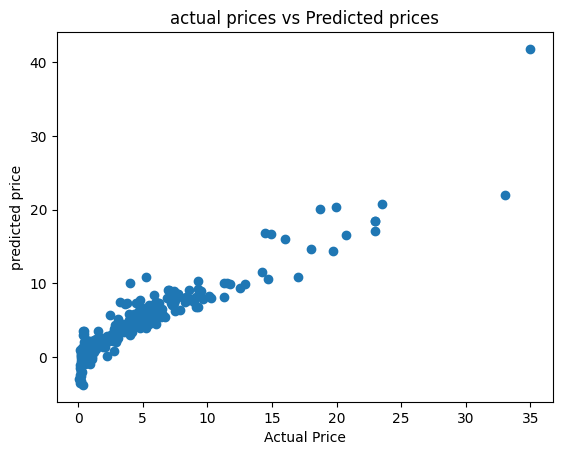

In [20]:
mt.scatter(Y_train,training_data_prediction)
mt.xlabel("Actual Price")
mt.ylabel("predicted price")
mt.title("actual prices vs Predicted prices")
mt.show()

In [21]:
#predicting on Testing Data
test_data_prediction = lin_reg_model.predict(X_test)


In [22]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R sruared Error : ",error_score)

R sruared Error :  0.8365766715027051


2.Lasso Regression

In [23]:
#loading the linear regreesion model
lass_reg_model = Lasso()

In [24]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [25]:
#prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [26]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8427856123435794


VISUALIZE THE actual and predicted prices

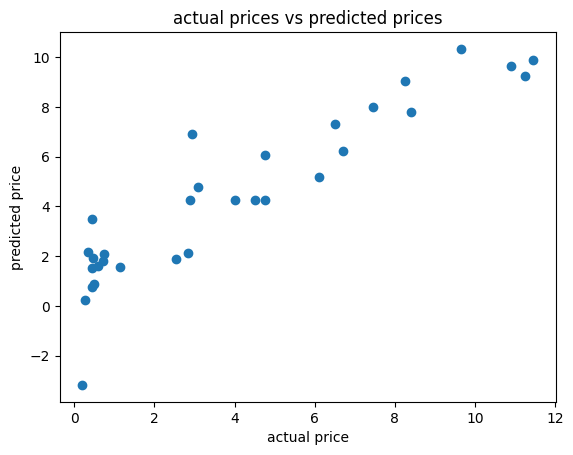

In [27]:
mt.scatter(Y_test,test_data_prediction)
mt.xlabel("actual price")
mt.ylabel("predicted price")
mt.title("actual prices vs predicted prices")
mt.show()